All used libraries are show imported in the following code block.

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import math

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('cleaned_data/cleaned.csv')
data.head(5)

,source_airline_country,source_airport_ID,source_airport_name,source_airport_city,source_airport_country,source_airport_lat,source_airport_long,source_airport_alt,destination_airport_ID,destination_airport_name,...,destination_airport_alt,airline_ID,airline_name,route_stops,IATA Code,icao_code,aircraft_name,aircraft_general_make,aircraft_company,airbus_boeing_other
0,Portugal,2965.0,Sochi International Airport,Sochi,Russia,43.449902,39.956600,89.0,2990.0,Kazan International Airport,...,411.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
1,Portugal,2966.0,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,-65.0,2990.0,Kazan International Airport,...,411.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
2,Portugal,2966.0,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,-65.0,2962.0,Mineralnyye Vody Airport,...,1054.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
3,Portugal,2968.0,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,769.0,2990.0,Kazan International Airport,...,411.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
4,Portugal,2968.0,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,769.0,4078.0,Tolmachevo Airport,...,365.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other


Below are some useful definitions that will be used later in the analysis of the data.

In [3]:

def t_test(group1, group2):
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    # Print the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

    return(t_statistic, p_value)



def linear_regression(data, features, target):
    X = data[features]
    y = data[target]

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Get coefficients, intercept, and R-squared
    coefficients = model.coef_
    intercept = model.intercept_
    r_squared = model.score(X, y)

    # Print the results
    print("Coefficients", coefficients)
    print("Intercept", intercept)
    print("R-Squared", r_squared)

    return coefficients, intercept, r_squared

def logistic_regression(dataset, features, target, test_size=0.2, random_state=42): # Note random state will always be set to 42 in our analysis
    # Load and prepare data
    X = data[features]
    y = data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a logistic regression model
    model = LogisticRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    confusion = confusion_matrix(y_test, y_pred)

    # Print the results
    print("Confusion Matrix", confusion)

    return confusion

Below are some definitions for basic visuals that can be used.

In [4]:
def stacked_bar_chart(data, categories, category_labels, colors=None, title=None, xlabel=None, ylabel=None, legend_labels=None):

    # Create figure and axis
    fig, ax = plt.subplots()

    # Number of categories
    num_categories = len(categories)

    # Set default colors if not provided
    if colors is None:
        colors = plt.cm.Paired(range(num_categories))

    # Initialize bottom values for stacking
    #bottom = [0] * len(data[0])

    # Plot each category as a stacked bar
    #for i in range(num_categories):
    #    ax.bar(category_labels, data[i], bottom=bottom, label=legend_labels[i] if legend_labels else None, color=colors[i])
    #    bottom = [bottom[j] + data[i][j] for j in range(len(data[i]))]

    # Add title, label, legend
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if legend_labels:
        ax.legend()

    return fig

def histogram(data, bins=10, color='blue', title=None, xlabel=None, ylabel=None):
    # Create figure and axis
    fig, ax = plt.subplots()

    # Plot the histogram
    ax.hist(data, bins=bins, color=color)

    # Add title and labels
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    return fig

def create_scatterplot(x, y, color='blue', title=None, xlabel=None, ylabel=None):
    # Create figure and axis
    fig, ax = plt.subplots()

    # Plot the scatterplot
    ax.scatter(x, y, color=color)

    # Add title and label
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    return fig

In [5]:
# Function to calculate distance using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Radius of the Earth in kilometers
    radius = 6371 
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c
    
    return distance

data['distance'] = data.apply(lambda row: haversine_distance(row['source_airport_lat'], 
                                                             row['source_airport_long'], 
                                                             row['destination_airport_lat'], 
                                                             row['destination_airport_long']), axis=1)

In [6]:
data['route'] = data['source_airport_name'] + " to " + data['destination_airport_name']

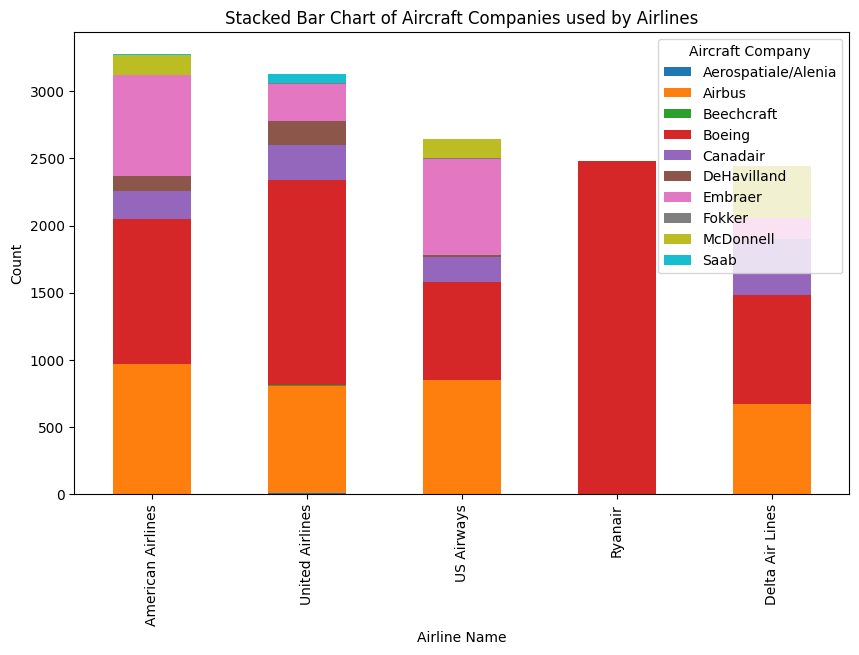

In [14]:
# Pivot the DataFrame to get counts of 'make' per 'airline'
pivot_df = data.pivot_table(index='airline_name', columns='aircraft_company', aggfunc='size', fill_value=0)
# Calculate the total count of routes for each airline
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame by the total count in descending order
pivot_df = pivot_df.sort_values(by='Total', ascending=False)
pivot_df = pivot_df.head(5)
pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

# Create a stacked bar chart
ax = pivot_df.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Airline Name')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Aircraft Companies used by Airlines')

# Display the legend
plt.legend(title='Aircraft Company', labels = pivot_df.columns[:-1], loc='upper right')
